In [1]:
"""

1.	What is learning in Machine learning and Deep learning?
= 
Machine learning is about mapping inputs to targets, which is done by observing many examples of input and targets whereas, 
Deep Learning does this input-to-target mapping via a deep/long sequence of simple data transformations (called "layers"), and these data transformations are learned by exposure to examples.
 
2.	Describe the relationship between the data, layers, loss function, and optimizer.
= 
In machine learning, data, layers, loss function, and optimizer are all important components that work together to train a model to perform a specific task. Training a neural network depends on 
these objects,
• The input data and corresponding targets. The data is the raw input that is used to train the machine learning model.
• Layers, which are combined into a network (or model). A layer is a data-processing module that takes as input some data and that outputs transformed data.
• The loss function, which defines the feedback signal used for learning. A loss function measures the quality of the network’s output, the quality of a particular set of parameters based on how well
the induced scores agreed with the ground truth labels in the training data.The loss score is used as a feedback signal to adjust the weights.
• The optimizer, which determines how learning proceeds. The Optimizer determines how the network will be updated based on the loss function.

"""

In [1]:
# import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt


# Load the data
data = pd.read_csv("card_transdata.csv")

# Inspect the data
data

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [3]:
# Separate the features and labels
X = data.drop('fraud', axis=1)
y = data['fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=64)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

Epoch 1/50
10000/10000 [==============================] - 18s 2ms/step - loss: 0.0170 - accuracy: 0.9941 - val_loss: 0.0078 - val_accuracy: 0.9966
Epoch 2/50
10000/10000 [==============================] - 18s 2ms/step - loss: 0.0079 - accuracy: 0.9971 - val_loss: 0.0043 - val_accuracy: 0.9985
Epoch 3/50
10000/10000 [==============================] - 18s 2ms/step - loss: 0.0067 - accuracy: 0.9975 - val_loss: 0.0045 - val_accuracy: 0.9983
Epoch 4/50
10000/10000 [==============================] - 18s 2ms/step - loss: 0.0060 - accuracy: 0.9977 - val_loss: 0.0051 - val_accuracy: 0.9979
Epoch 5/50
10000/10000 [==============================] - 20s 2ms/step - loss: 0.0052 - accuracy: 0.9980 - val_loss: 0.0051 - val_accuracy: 0.9979
Epoch 6/50
10000/10000 [==============================] - 18s 2ms/step - loss: 0.0050 - accuracy: 0.9981 - val_loss: 0.0035 - val_accuracy: 0.9985
Epoch 7/50
10000/10000 [==============================] - 21s 2ms/step - loss: 0.0045 - accuracy: 0.9983 - val_loss: 0

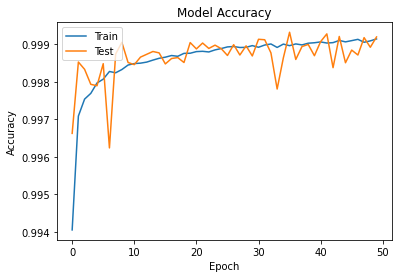

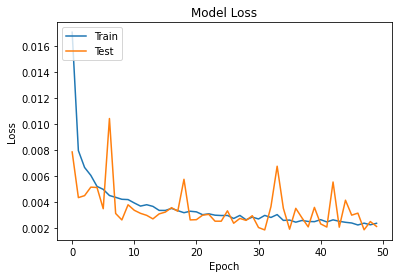

In [4]:
# Plot the accuracy and loss curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()